# 1. 데이터 불러오기

In [1]:
import statsmodels.formula.api as sm
import pandas as pd
import seaborn as sns

df = pd.read_csv('churn.csv', index_col = 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. 데이터 전처리(4개 변수만 사용: gender, SeniorCitizen, Dependents, tenure)

## 2.1 범주형 데이터 처리

In [2]:
categories_nums = {"gender":  {"Male": 0, "Female": 1},                
                "Dependents": {"No": 0, "Yes":1},                
                "Churn": {"No": 0, "Yes":1}}
df = df.replace(categories_nums)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,Yes,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,0,0,No,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
3668-QPYBK,0,0,No,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,0,0,No,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,1,0,No,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## 2.2 상관계수 분석

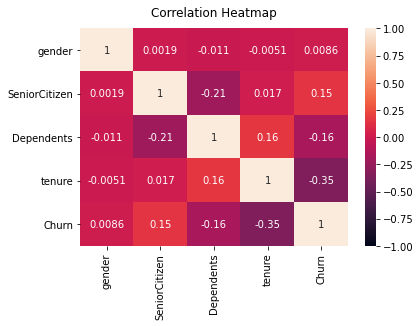

## 2.3. 데이터 분할(학습 vs. 평가)

In [4]:
from sklearn.model_selection import train_test_split
y = df['Churn']
X = df[['gender','SeniorCitizen','Dependents','tenure']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
df_y_train=pd.DataFrame(data=y_train,columns=['Churn'])
df_train=pd.concat([X_train, df_y_train], axis=1)
df_y_test=pd.DataFrame(data=y_test,columns=['Churn'])
df_test=pd.concat([X_test, df_y_test], axis=1)
df_train.head()

,gender,SeniorCitizen,Dependents,tenure,Churn
customerID,,,,,
9174-IHETN,1,0,1,50,0
2026-TGDHM,1,0,0,7,1
0831-JNISG,0,0,1,71,0
4465-VDKIQ,1,0,0,18,0
8331-ZXFOE,1,0,0,58,0


# 3. 회귀분석

## 3.1 로지스틱 회귀분석

Optimization terminated successfully.
         Current function value: 0.495377
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5277
Method:                           MLE   Df Model:                            4
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:                  0.1456
Time:                        14:12:24   Log-Likelihood:                -2616.6
converged:                       True   LL-Null:                       -3062.6
Covariance Type:            nonrobust   LLR p-value:                9.094e-192
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0216      0.064     -0.337      0.736      -0.147       0.

Optimization terminated successfully.
         Current function value: 0.495480
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5282
Model:                          Logit   Df Residuals:                     5278
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:                  0.1454
Time:                        14:12:24   Log-Likelihood:                -2617.1
converged:                       True   LL-Null:                       -3062.6
Covariance Type:            nonrobust   LLR p-value:                8.382e-193
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0137      0.055      0.251      0.802      -0.093       0.

## 3.2. 성능 평가

### 3.2.1. 학습데이터

In [7]:
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,precision_score,recall_score)

predictions = log_reg.predict(df_train[['SeniorCitizen','Dependents','tenure']])
predictions = list(map(round, predictions))

# confusion matrix
cm = confusion_matrix(df_train['Churn'], predictions) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(df_train['Churn'], predictions))
print('recall_score (sensitivity) = ', recall_score(df_train['Churn'], predictions)) # sensitivity
print('specificity = ', cm[0,0]/(cm[0,0]+cm[0,1])) # specificity

Confusion Matrix : 
 [[3751  123]
 [1191  217]]
Test accuracy =  0.751230594471791
recall_score (sensitivity) =  0.15411931818181818
specificity =  0.9682498709344347


### 3.2.2. 평가데이터

Confusion Matrix : 
 [[1251   49]
 [ 388   73]]
Test accuracy =  0.7518455423055083
recall_score (sensitivity) =  0.15835140997830802
specificity =  0.9623076923076923
